### Context
All residential properties sold in Ireland from 2010 to May 28th 2021 (28/05/21)

### Content
- SALE_DATE	=> Date of sale (dd/MM/yyyy) | datatime64[ns]
- ADDRESS => Address | string
- POSTAL_CODE => Postal Code | string
- COUNTY => County | string
- SALE_PRICE => Price (€) | float32
- IF_MARKET_PRICE => Not Full Market Price | int8
- IF_VAT_EXCLUDED => VAT Exclusive | int8
- PROPERTY_DESC => Description of Property | string
- PROPERTY_SIZE_DESC => Property Size Description | string

### Library Import

In [1]:
import pandas as pd
import numpy as np

#import seaborn as sns
#sns.set(color_codes=True)

import matplotlib.pyplot as plt
#%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


### Dataset Reading

In [2]:
df = pd.read_csv('Property_Price_Register_Ireland-28-05-2021.csv')

### Preprocessing

##### Observing and describing data

Gathering information about the dataset to get initial impressions and identify any necessary corrections for further analysis.

In [3]:
df.head()

,SALE_DATE,ADDRESS,POSTAL_CODE,COUNTY,SALE_PRICE,IF_MARKET_PRICE,IF_VAT_EXCLUDED,PROPERTY_DESC,PROPERTY_SIZE_DESC
0,2010-01-01,"5 Braemor Drive, Churchtown, Co.Dublin",NaN,Dublin,343000.0,0,0,Second-Hand Dwelling house /Apartment,NaN
1,2010-01-03,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,0,1,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,2010-01-04,"1 Meadow Avenue, Dundrum, Dublin 14",NaN,Dublin,438500.0,0,0,Second-Hand Dwelling house /Apartment,NaN
3,2010-01-04,"1 The Haven, Mornington",NaN,Meath,400000.0,0,0,Second-Hand Dwelling house /Apartment,NaN
4,2010-01-04,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000.0,0,0,Second-Hand Dwelling house /Apartment,NaN


In [4]:
df.shape

(476745, 9)

In [5]:
df.describe()

,SALE_PRICE,IF_MARKET_PRICE,IF_VAT_EXCLUDED
count,4.767450e+05,476745.000000,476745.000000
mean,2.590403e+05,0.048984,0.159618
std,8.526791e+05,0.215835,0.366252
min,5.030530e+03,0.000000,0.000000
25%,1.150000e+05,0.000000,0.000000
50%,1.950000e+05,0.000000,0.000000
75%,3.000000e+05,0.000000,0.000000
max,1.701428e+08,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476745 entries, 0 to 476744
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   SALE_DATE           476745 non-null  object 
 1   ADDRESS             476745 non-null  object 
 2   POSTAL_CODE         89764 non-null   object 
 3   COUNTY              476745 non-null  object 
 4   SALE_PRICE          476745 non-null  float64
 5   IF_MARKET_PRICE     476745 non-null  int64  
 6   IF_VAT_EXCLUDED     476745 non-null  int64  
 7   PROPERTY_DESC       476745 non-null  object 
 8   PROPERTY_SIZE_DESC  52792 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 32.7+ MB


In [7]:
df.isnull().sum()

SALE_DATE                  0
ADDRESS                    0
POSTAL_CODE           386981
COUNTY                     0
SALE_PRICE                 0
IF_MARKET_PRICE            0
IF_VAT_EXCLUDED            0
PROPERTY_DESC              0
PROPERTY_SIZE_DESC    423953
dtype: int64

##### Function imprimir_valores_unicos()

A function that prints the unique values of each variable.

In [8]:
def imprimir_valores_unicos(data_f):
    for coluna in data_f.columns:
        valores_unicos = data_f[coluna].unique()
        print(f"  {coluna} = {valores_unicos}")

imprimir_valores_unicos(df)

  SALE_DATE = ['2010-01-01' '2010-01-03' '2010-01-04' ... '2021-05-26' '2021-05-27'
 '2021-05-28']
  ADDRESS = ['5 Braemor Drive, Churchtown, Co.Dublin'
 '134 Ashewood Walk, Summerhill Lane, Portlaoise'
 '1 Meadow Avenue, Dundrum, Dublin 14' ... 'MULTYFARNHAM, WESTMEATH'
 'NO 2 RIVERLODGE, SHRONE, GLENGARIFF' 'RABANE, KILL, COOTEHILL']
  POSTAL_CODE = [nan 'Dublin 14' 'Dublin 2' 'Dublin 13' 'Dublin 12' 'Dublin 4' 'Dublin 11'
 'Dublin 9' 'Dublin 24' 'Dublin 15' 'Dublin 22' 'Dublin 5' 'Dublin 18'
 'Dublin 6' 'Dublin 6w' 'Dublin 7' 'Dublin 16' 'Dublin 8' 'Dublin 3'
 'Dublin 1' 'Dublin 17' 'N� Bhaineann' 'Dublin 20' 'Dublin 10'
 'Baile �tha Cliath 14' 'Baile ?tha Cliath 17' 'Baile �tha Cliath 5'
 'Baile �tha Cliath 3' 'Baile �tha Cliath 15' 'Baile �tha Cliath 4'
 'Baile �tha Cliath 9' 'Baile �tha Cliath 18']
  COUNTY = ['Dublin' 'Laois' 'Meath' 'Kilkenny' 'Limerick' 'Carlow' 'Cork' 'Clare'
 'Sligo' 'Cavan' 'Tipperary' 'Wicklow' 'Roscommon' 'Wexford' 'Mayo'
 'Donegal' 'Longford' 'Galway' 'O

##### Exclusion of Variables

The variables POSTAL_CODE and PROPERTY_SIZE_DESC have 386,981 and 423,953 null values respectively and should be excluded due to missing data.

In [9]:
df = df.drop(columns=['POSTAL_CODE','PROPERTY_SIZE_DESC'])
df

,SALE_DATE,ADDRESS,COUNTY,SALE_PRICE,IF_MARKET_PRICE,IF_VAT_EXCLUDED,PROPERTY_DESC
0,2010-01-01,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,343000.0,0,0,Second-Hand Dwelling house /Apartment
1,2010-01-03,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,185000.0,0,1,New Dwelling house /Apartment
2,2010-01-04,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,438500.0,0,0,Second-Hand Dwelling house /Apartment
3,2010-01-04,"1 The Haven, Mornington",Meath,400000.0,0,0,Second-Hand Dwelling house /Apartment
4,2010-01-04,"11 Melville Heights, Kilkenny",Kilkenny,160000.0,0,0,Second-Hand Dwelling house /Apartment
...,...,...,...,...,...,...,...
476740,2021-05-28,"GRANGE STORES, GRANGE, MULLINGAR",Westmeath,150000.0,0,0,Second-Hand Dwelling house /Apartment
476741,2021-05-28,"MAIN STREET, LOWER BORRIS, BORRIS",Carlow,170000.0,1,0,Second-Hand Dwelling house /Apartment
476742,2021-05-28,"MULTYFARNHAM, WESTMEATH",Westmeath,175000.0,0,0,Second-Hand Dwelling house /Apartment
476743,2021-05-28,"NO 2 RIVERLODGE, SHRONE, GLENGARIFF",Cork,240000.0,0,0,Second-Hand Dwelling house /Apartment


### Inconsistent Data

In PROPERTY_DESC, there are some data containing unknown characters. They are considered null and their records are deleted afterwards.

In [10]:
df["PROPERTY_DESC"] = df["PROPERTY_DESC"].replace(to_replace="Teach/�ras�n C�naithe Ath�imhe", value=np.nan)
df["PROPERTY_DESC"] = df["PROPERTY_DESC"].replace(to_replace="Teach/�ras�n C�naithe Nua", value=np.nan)
df["PROPERTY_DESC"] = df["PROPERTY_DESC"].replace(to_replace="Teach/?ras?n C?naithe Nua", value=np.nan)

df = df.dropna(axis = 0, how ='any') 

### Duplicate Data

Duplicate data (770 records) are found and deleted.

In [11]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: " , duplicate_rows_df.shape)

number of duplicate rows:  (770, 7)


In [12]:
df = df.drop_duplicates()

### Results

With data cleaning, the columns POSTAL_CODE and PROPERTY_SIZE_DESC were deleted due to their large majority of null data, and 804 records were deleted due to duplicity or incorrect data.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 475941 entries, 0 to 476744
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SALE_DATE        475941 non-null  object 
 1   ADDRESS          475941 non-null  object 
 2   COUNTY           475941 non-null  object 
 3   SALE_PRICE       475941 non-null  float64
 4   IF_MARKET_PRICE  475941 non-null  int64  
 5   IF_VAT_EXCLUDED  475941 non-null  int64  
 6   PROPERTY_DESC    475941 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 29.0+ MB


### Separation of Month and Year

The variable SALE_DATE is split into month and year to facilitate temporal analysis.

In [14]:
df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE'])

df['SALE_MONTH'] = df['SALE_DATE'].dt.month
df['SALE_YEAR'] = df['SALE_DATE'].dt.year

In [15]:
df

,SALE_DATE,ADDRESS,COUNTY,SALE_PRICE,IF_MARKET_PRICE,IF_VAT_EXCLUDED,PROPERTY_DESC,SALE_MONTH,SALE_YEAR
0,2010-01-01,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,343000.0,0,0,Second-Hand Dwelling house /Apartment,1,2010
1,2010-01-03,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,185000.0,0,1,New Dwelling house /Apartment,1,2010
2,2010-01-04,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,438500.0,0,0,Second-Hand Dwelling house /Apartment,1,2010
3,2010-01-04,"1 The Haven, Mornington",Meath,400000.0,0,0,Second-Hand Dwelling house /Apartment,1,2010
4,2010-01-04,"11 Melville Heights, Kilkenny",Kilkenny,160000.0,0,0,Second-Hand Dwelling house /Apartment,1,2010
...,...,...,...,...,...,...,...,...,...
476740,2021-05-28,"GRANGE STORES, GRANGE, MULLINGAR",Westmeath,150000.0,0,0,Second-Hand Dwelling house /Apartment,5,2021
476741,2021-05-28,"MAIN STREET, LOWER BORRIS, BORRIS",Carlow,170000.0,1,0,Second-Hand Dwelling house /Apartment,5,2021
476742,2021-05-28,"MULTYFARNHAM, WESTMEATH",Westmeath,175000.0,0,0,Second-Hand Dwelling house /Apartment,5,2021
476743,2021-05-28,"NO 2 RIVERLODGE, SHRONE, GLENGARIFF",Cork,240000.0,0,0,Second-Hand Dwelling house /Apartment,5,2021


### Converção de valores categorizados para numericos
Converter variáveis categóricas em valores numéricos permite utilizar uma variedade mais ampla de algoritmos no modelo de Machine Learning e em alguns modelos há a exigencia de que todas as variáveis de entrada sejam numéricas. Além de ajudar a padronizar os dados e torná-los mais fáceis de interpretar e analisar.

##### Codificação one-hot (dummy variables)
Na variável COUNTY há varias categorias e a tecnica de 'dummy variables' serve para garantir que os valores numéricos atribuídos às categorias não sejam interpretados como valores ordinais (ou seja, valores que têm uma ordem específica)

In [16]:
one_hot_encoded = pd.get_dummies(df['COUNTY'])

# Concatenar as variáveis one-hot ao DataFrame original
df = pd.concat([df, one_hot_encoded], axis=1)

##### Transformacao de valores
A variavel PROPERTY_DESC possui apenas dois valores ('Second-Hand Dwelling house /Apartment' e 'New Dwelling house /Apartment') e podemos substitui-los por 0 e 1 respectivamente

In [17]:
# Mapear valores para booleanos
mapeamento = {'Second-Hand Dwelling house /Apartment': 0, 'New Dwelling house /Apartment': 1}
df['PROPERTY_DESC'] = df['PROPERTY_DESC'].map(mapeamento)

In [18]:
df

,SALE_DATE,ADDRESS,COUNTY,SALE_PRICE,IF_MARKET_PRICE,IF_VAT_EXCLUDED,PROPERTY_DESC,SALE_MONTH,SALE_YEAR,Carlow,...,Meath,Monaghan,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow
0,2010-01-01,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,343000.0,0,0,0,1,2010,False,...,False,False,False,False,False,False,False,False,False,False
1,2010-01-03,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,185000.0,0,1,1,1,2010,False,...,False,False,False,False,False,False,False,False,False,False
2,2010-01-04,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,438500.0,0,0,0,1,2010,False,...,False,False,False,False,False,False,False,False,False,False
3,2010-01-04,"1 The Haven, Mornington",Meath,400000.0,0,0,0,1,2010,False,...,True,False,False,False,False,False,False,False,False,False
4,2010-01-04,"11 Melville Heights, Kilkenny",Kilkenny,160000.0,0,0,0,1,2010,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476740,2021-05-28,"GRANGE STORES, GRANGE, MULLINGAR",Westmeath,150000.0,0,0,0,5,2021,False,...,False,False,False,False,False,False,False,True,False,False
476741,2021-05-28,"MAIN STREET, LOWER BORRIS, BORRIS",Carlow,170000.0,1,0,0,5,2021,True,...,False,False,False,False,False,False,False,False,False,False
476742,2021-05-28,"MULTYFARNHAM, WESTMEATH",Westmeath,175000.0,0,0,0,5,2021,False,...,False,False,False,False,False,False,False,True,False,False
476743,2021-05-28,"NO 2 RIVERLODGE, SHRONE, GLENGARIFF",Cork,240000.0,0,0,0,5,2021,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
#ProfileReport(df)

In [20]:
X = df.drop(columns=['SALE_DATE','ADDRESS','COUNTY','IF_MARKET_PRICE'])
y = df['IF_MARKET_PRICE']

In [21]:
#print(df['SALE_PRICE'].isna().sum())

In [22]:
# Divisão com 20% para o conjunto de treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((380752, 31), (95189, 31), (380752,), (95189,))

In [23]:
# Display the rows and columns (dimenions) of an unsplitted dataset
print('Total number of rows and columns for the complete dataset: ', X.shape, y.shape)

# Display the rows and columns (dimenions) of the splitted dataset
print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape )

Total number of rows and columns for the complete dataset:  (475941, 31) (475941,)
Number of rows and columns after splitting dataset:  (380752, 31) (95189, 31) (380752,) (95189,)


In [24]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth = 4, random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [25]:
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Display both actual and predicted values column-wise
result_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(result_df)

       Actual  Predicted
0           0          0
1           0          0
2           0          0
3           0          0
4           1          0
...       ...        ...
95184       0          0
95185       0          0
95186       0          0
95187       0          0
95188       1          0

[95189 rows x 2 columns]


In [26]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.95

Confusion Matrix:
[[90425   144]
 [ 4407   213]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     90569
           1       0.60      0.05      0.09      4620

    accuracy                           0.95     95189
   macro avg       0.78      0.52      0.53     95189
weighted avg       0.94      0.95      0.93     95189



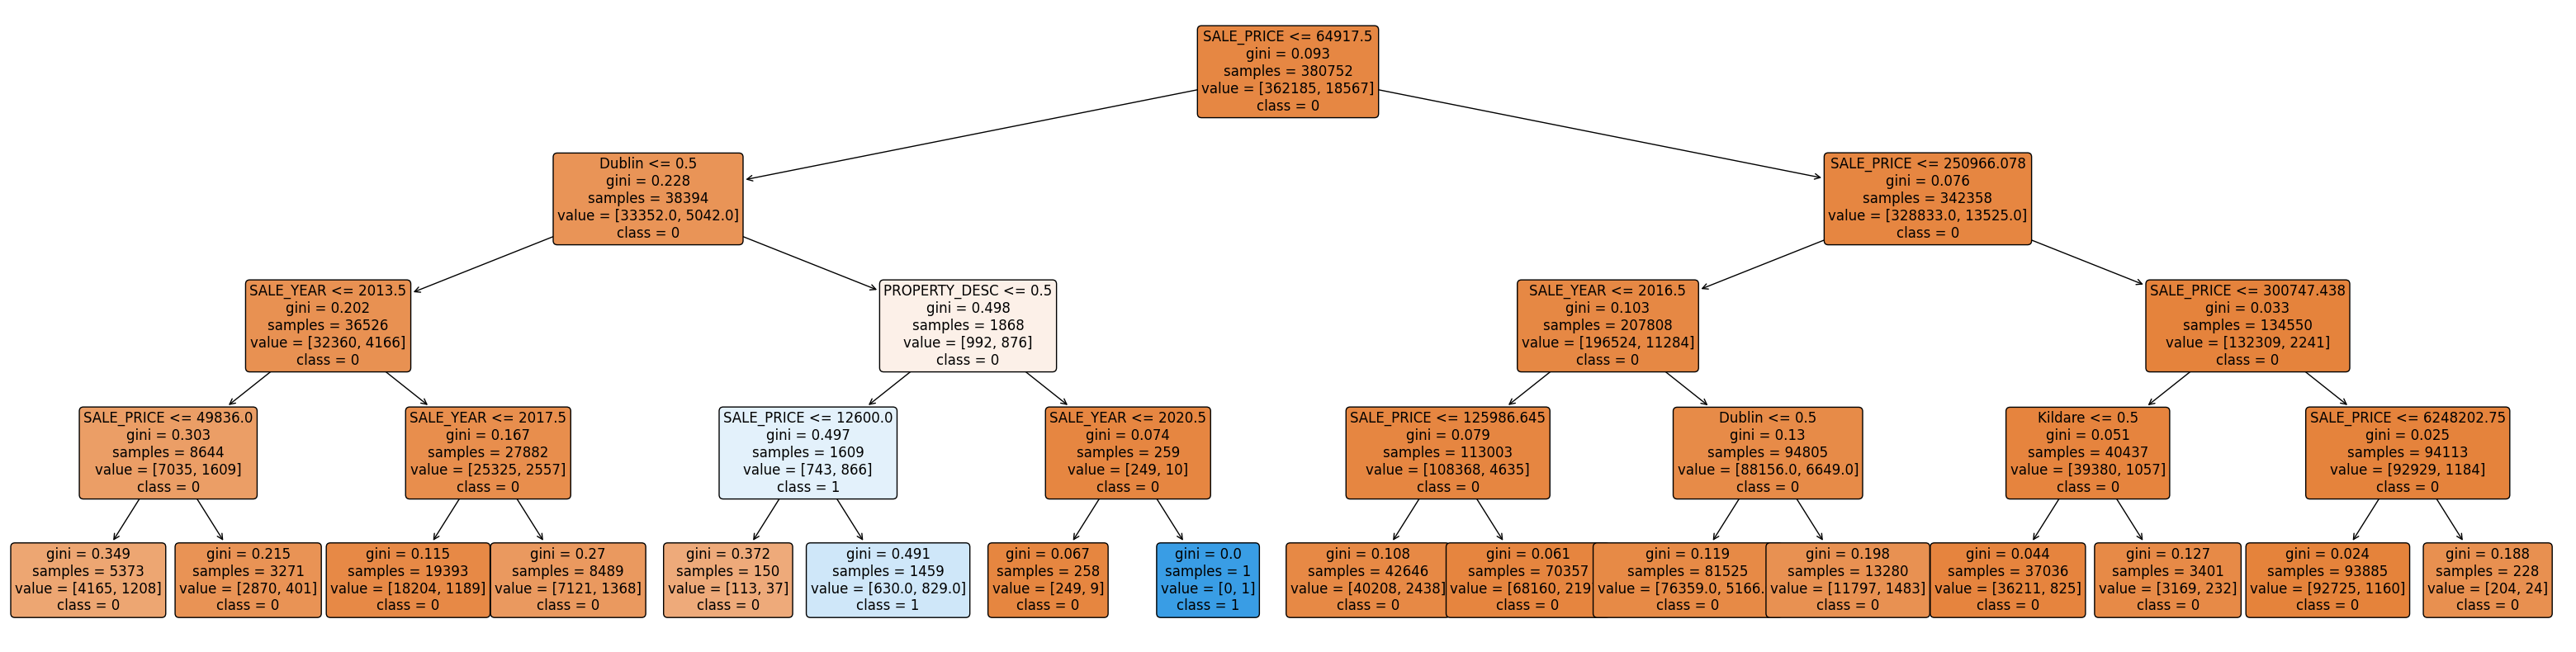

In [30]:
# Plot the Decision Tree
plt.figure(figsize=(40, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns.tolist(), class_names=df['IF_MARKET_PRICE'].unique().astype(str).tolist(), rounded=True, fontsize=12)
plt.show()